# Aprendizado de Máquina para diferenciar cadeiras de mesas

## Autor
**Nome**: Pedro Lucas Cassiano Martins<br>
**Matrícula**: 190036567<br>
**Github**: [PedroLucasCM](https://github.com/PedroLucasCM)
**Repositório**: [FastaiOnCampus](https://github.com/PedroLucasCM/FastaiOnCampus)
## Resumo
<p>O aprendizado de Máquina vem crescendo muito no mercado desde a última decada e é uma área da computação/informática muito estudada também, por isso estamos estudando essa área no curso de Engenharia de Software na Faculdade do Gama da Universidade de Brasília.</p>
<p>Esse artigo foi criado no intuito de continuar este estudo, criando aqui uma máquina que consiga distinguir imagens de outras, seperando-as em categoria e a treinando para conseguir uma maior precisão na distinção das imagens. Concluímos então, que a máquina em pouco tempo consegue ter um grande sucesso nessa tarefa.</p>

**O estudo é majoritariamente baseado no curso "_fast.ai_" de Jeremy Howard, mencionado na blibliografia desse artigo.**

## Objetivo
<p>O objetivo deste artigo é o de construir/criar uma página no gradio de um modelo criado capaz de diferenciar e reconhecer cadeiras (<strong>chairs</strong>) e mesas(<strong>tables</strong>) relacionadas por usarmos cadeiras para nos sentar a mesa. Aqui teremos imagens de cadeiras e mesas com 4(quatro) pernas, 3(três) pernas e até mesmo 1(uma) perna, além de estarem em lugares variados, tudo isso para termos mais diferenciação e precisão nesse trabalho de reconhecimento das imagens pela máquina.</p>

## Etapa 0: Atualizar o pip/fastai

In [16]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search
    !pip install -Uqq gradio
    !pip install -Uqq nbdev

## Etapa 1: Buscando Imagem

Nesta etapa mais opcional, e inserida aqui para quem não tem uma imagem de uma cadeira para ser utilizada como exemplo, baixamos uma imagem de uma cadeira utilizando o *duckduckgo_search* e o *fastdownload* com a função *search_images* criada para fazer a busca.

In [17]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term: str, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

urls = search_images('chair photos', max_images=3)
from fastdownload import download_url
dest = 'chair.jpg'
download_url(urls[0], dest, show_progress=False)

Searching for 'chair photos'


Path('chair.jpg')

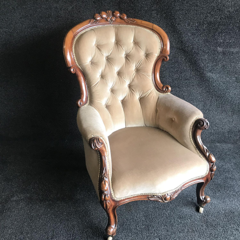

In [18]:
#|export
im = PILImage.create('chair.jpg')
im.to_thumb(240,240)

> Acima está a imagem de uma cadeira que buscamos.

## Etapa 2: Checagem da imagem

Aqui criamos a função *classify_image* que mostra a porcentagem da imagem de ser uma cadeira e a de ser uma mesa, a imagem será classifica como a categoria de maior porcentagem

In [19]:
#|default_exp app
%notebook -e app.ipynb

In [20]:
#|export
from fastai.vision.all import *
import gradio as gr

categories = ('chair', 'table')

def classify_image(img):
        pred,idx,probs = learn.predict(img)
        return dict(zip(categories, map(float,probs)))

# Etapa 3: Importação e Gradio
Abaixo nós importamos o modelo criado em outro [notebook](https://www.kaggle.com/code/pedrocassiano/lesson2-pedrolucascm/edit) utilizando o *load_learner* com caminho do modelo inserido nos dados.

In [22]:
#|export
learn = load_learner('/kaggle/input/modelpk1/modelchair')

E nessa última parte da Etapa 3 está o código para a criação do aplicativo utilizando gradio.

In [23]:
classify_image(im)

{'chair': 0.9984527826309204, 'table': 0.0015471794176846743}

> Como podemos ver pelo exemplo da função criada na etapa 2, na classificação da imagem mostra que a imagem é identificada como tendo 99% de chance de ser cadeira e 0,015% de chance de ser mesa.

In [28]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
#examples = ['table1.jpg', 'chair2.jpg','table.jpg','chair.jpg', 'chair1.jpg']
examples = ['chair.jpg']
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/opt/conda/lib/python3.7/site-packages/gradio/inputs.py:258: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/opt/conda/lib/python3.7/site-packages/gradio/outputs.py:198: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://7aa887ea61a57a010d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


A função mais importante aqui é a *gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)* que cria a interface para o aplicativo e explicaremos não muito detalhadamente o que cada parâmetro é:
> fn=classify_image: função utilizada/chamada para conseguir o output, no caso a classify_image criada na etapa 2

> inputs=image: qual input será utilizado na função, no caso a image que chama Imagens/br

> outputs=label: saída da função, no caso labels que são os classificadores/br

> examples=examples: exemplos que podem ser utilizados no input

## Etapa 3.2: Exportação do notebook
Etapa para a exportação do notebook para script e utilizado no Hugging Face para o app.

In [25]:
from nbdev.export import nb_export
nb_export('app.ipynb', 'app')

## Deployment
Neste link do [HuggingFace](https://huggingface.co/spaces/Herises/FastaionCampus) poderemos encontrar o aplicativo/website criado com o gradio nesse artigo.

## Bibliografia
Howard, Jeremy. **Practical Deep Learning for Coders**, 2022. Disponível em: https://course.fast.ai/. Acesso em: 02 de abr. de 2023. <br>
Howard, Jeremy. **Lesson 1: Getting Started**, 2022. Disponível em: https://course.fast.ai/Lessons/lesson1.html. Acesso em: 11 de abr. de 2023.<br>
Howard, Jeremy. **Lesson 2: Deployment**, 2022. Disponível em: https://course.fast.ai/Lessons/lesson2.html. Acesso em: 11 de abr. de 2023.<br>
Howard, Jeremy. **Lesson 2: Practical Deep Learning for Coders 2022**, 2022. Disponível em: https://www.youtube.com/watch?v=F4tvM4Vb3A0&t=1305s. Acesso em: 11 de abr. de 2023.